# Analyses
Ce notebook a été utilisé pour faire quelques analyses de données lorsque l'arrosage n'était pas encore fonctionnel.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import os



In [22]:
os.system('scp pi@192.168.1.204:/home/pi/E2_watering/report/soil_moisture.csv  /home/iomys/Programmation/E2_watering/report/soil_moisture.csv')

256

In [23]:
df = pd.read_csv('soil_moisture_to_2021_05_30.csv', parse_dates=True,index_col='timestamp',sep='\s*,\s*',engine='python')
df



,chinois,cap1,cap2,soil temperature,temperature,humidity
timestamp,,,,,,
2021-05-18 22:13:03.930138,719,855,381,11.6875,NaN,NaN
2021-05-18 22:14:03.311809,726,836,383,11.6875,NaN,NaN
2021-05-18 22:15:03.686890,722,832,383,11.6875,NaN,NaN
2021-05-18 22:16:03.989089,734,837,383,11.6875,NaN,NaN
2021-05-18 22:17:03.348559,738,857,383,11.6875,NaN,NaN
...,...,...,...,...,...,...
2021-05-30 14:47:03.622828,1017,448,336,19.5625,NaN,NaN
2021-05-30 14:48:04.114997,1018,397,333,19.5625,NaN,NaN
2021-05-30 14:49:03.485849,1017,396,333,19.5625,NaN,NaN


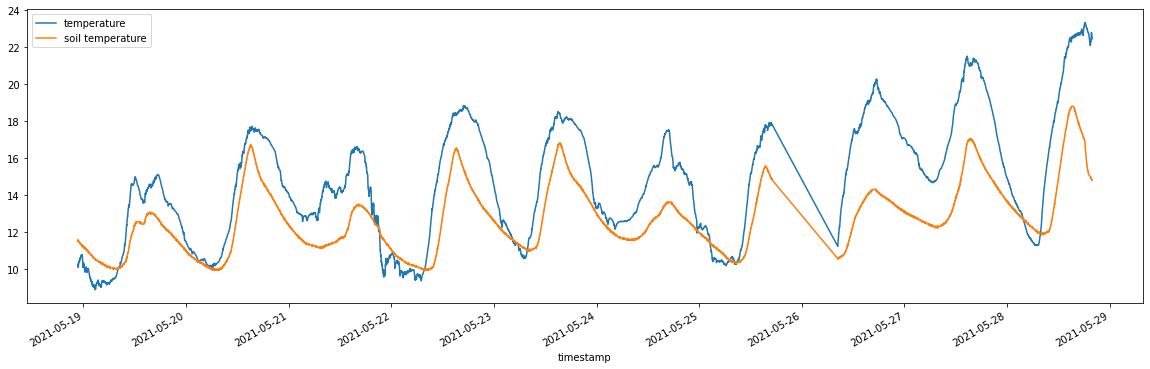

In [30]:
df2 = df[df.index >"2021-05-18 18:00"][["temperature", "soil temperature"]]
df2[df2.temperature > 0].plot(figsize=(20, 6))
plt.savefig("../fig/temperature.svg")

df2


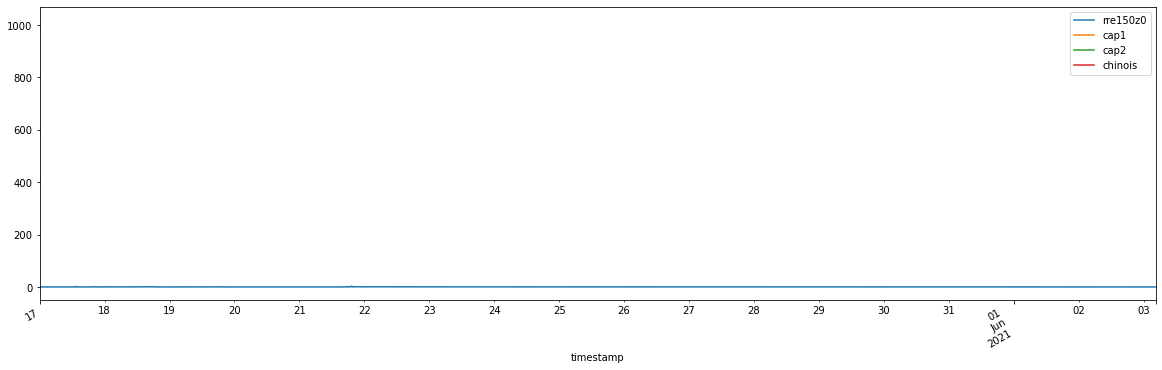

In [49]:
fig, axs = plt.subplots(figsize=(20,6))
custom_date_parser = lambda x: datetime.strptime(x, "%Y%m%d%H%M")

precipitation = pd.read_csv("precipitations.txt", delimiter=";", parse_dates=["time"], date_parser=custom_date_parser, index_col=["time"])
precipitation
precipitation.plot(ax=axs)


#df3 = df[["cap1", "cap2", "chinois", "cap0"]]
df3 = df[["cap1", "cap2", "chinois"]]
#df3 = df3[df3['cap0']<=1024]
df3 = df3[df3['cap1']<=1024]
df3 = df3[df3['cap2']<=1024]
#df3 = df3[df3['chinois']<=1024]
#df3 = df3[df3.index >"2021-05-30 13:00"][["cap1", "cap2", "cap0", "chinois"]]
#df3 = df3[df3.index <"2021-05-22 06:00"][["cap1", "cap2", "cap0", "chinois"]]


#chinois
#df3 = df3[((df3.chinois.shift() - df3.chinois)<50)] #Supression des sauts négatifs
#df3 = df3[((df3.chinois - df3.chinois.shift())<50)] #Supression des sauts positifs

#cap0
#df3 = df3[((df3.cap0.shift() - df3.cap0)<20)] #Supression des sauts négatifs
#df3 = df3[((df3.cap0 - df3.cap0.shift())<20)] #Supression des sauts positifs

#cap1
df3 = df3[((df3.cap1.shift() - df3.cap1)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap1 - df3.cap1.shift())<20)] #Supression des sauts positifs
#
# #cap2
df3 = df3[((df3.cap2.shift() - df3.cap2)<20)] #Supression des sauts négatifs
df3 = df3[((df3.cap2 - df3.cap2.shift())<20)] #Supression des sauts positifs

#chinois
df3 = df3[((df3.chinois.shift() - df3.chinois)<20)] #Supression des sauts négatifs
df3 = df3[((df3.chinois - df3.chinois.shift())<20)]

#Moving Average
df3 = df3.rolling(60).mean()

#Création du plot

df3[["cap1", "cap2", "chinois"]].plot(figsize=(20, 6), ax=axs)
#ax1 = ax.twinx()
#df3["cap2"].plot(ax=ax1, color="red")
plt.savefig("/home/iomys/Programmation/E2_watering/fig/moisture.svg")

<AxesSubplot:xlabel='timestamp'>

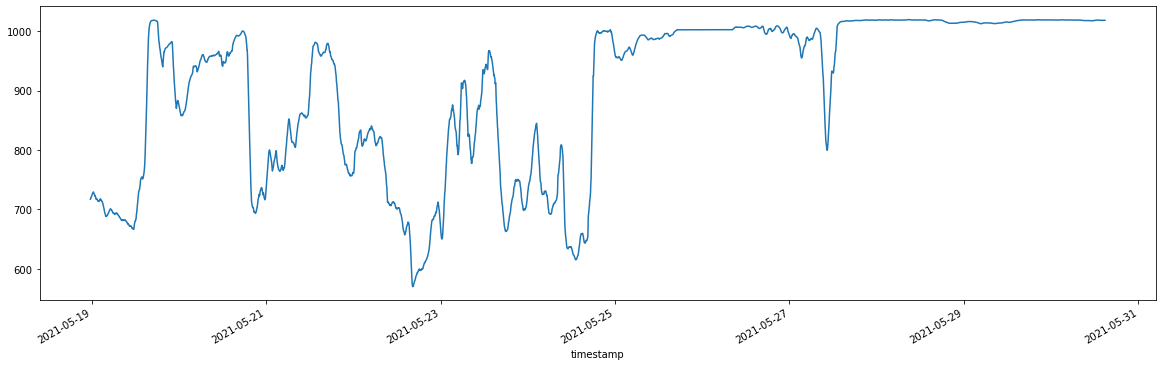

In [27]:
df3.chinois.plot(figsize=(20, 6))

## Cap

|  | cap 1 | cap 2 |
| - | - | - |
| **air** | 550 | 485 |
| **eau** | 295 | 292 |
| **sol détrempé** | 295 | 315 |



#